In [770]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [771]:
X, y, coef = make_regression(n_samples=1500, n_features=4, n_informative=2, n_targets=1, noise=0.1, coef=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=1000)
df = pd.DataFrame(x_train)
df['target'] = y_train

df = df.rename(columns={0:"feature 1", 1:"feature 2", 2:"feature 3", 3:"feature 4"})
df

,feature 1,feature 2,feature 3,feature 4,target
0,1.339306,0.435057,-0.962420,0.624816,20.686121
1,0.476554,-0.317361,1.632411,1.607905,199.701003
2,1.560067,-0.391212,-1.398265,0.251041,-27.898118
3,1.416627,-0.559152,-0.626196,-0.880478,-99.713377
4,-0.053178,0.389343,0.091316,-0.916188,-77.208194
...,...,...,...,...,...
995,0.024796,-0.978986,0.193327,-1.552732,-129.772709
996,1.666592,0.437522,-1.056400,0.839457,36.306504
997,-2.341857,0.632505,0.648341,-0.214193,4.250362
998,0.589514,0.111392,0.660486,0.547507,71.515557


In [772]:
coef

array([ 0.        ,  0.        , 35.66029874, 87.93639078])

In [773]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model_a = model.coef_
model_b = model.intercept_

In [774]:
model_a, model_b

(array([1.62300534e-03, 3.87576812e-03, 3.56635085e+01, 8.79374699e+01]),
 -0.001442033222138983)

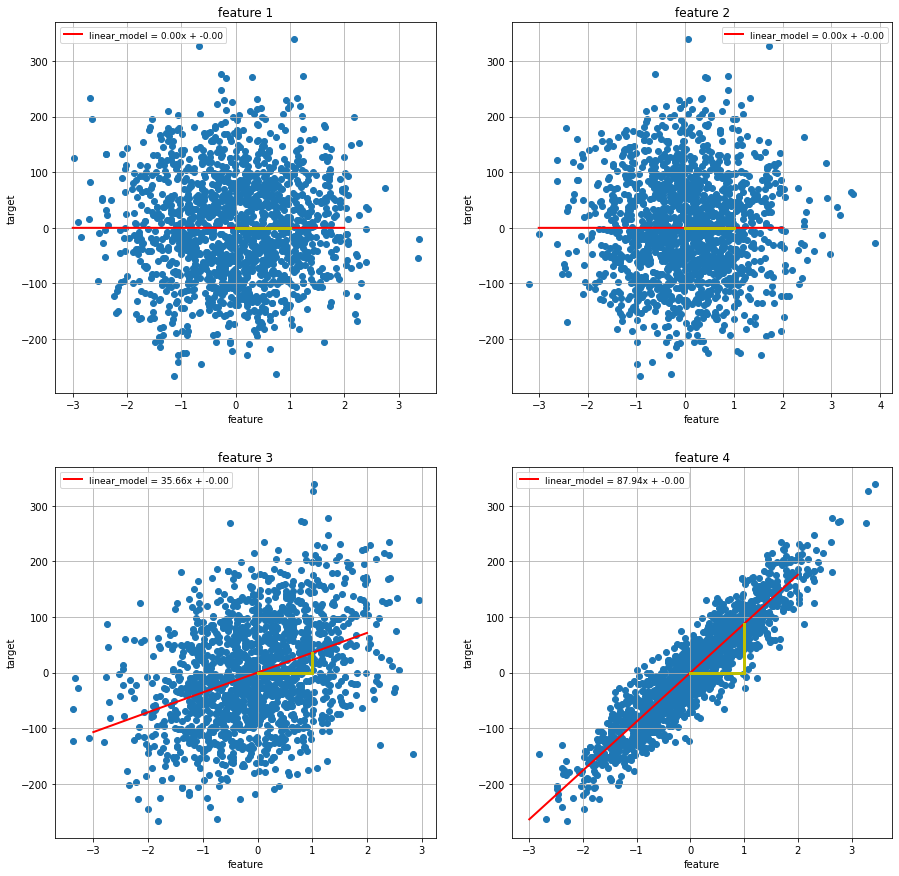

In [775]:
figure, axis = plt.subplots(2, 2,figsize=(15, 15))

x = np.arange(-3, 3)

j=0
k=0

for i in range(0,4):
  if i == 2:
    j += 1
    k = 0
  model_y_sk = model_a[i] * x + model_b
  axis[j,k].plot(x, model_y_sk, linewidth=2, c='r', label=f'linear_model = {model_a[i]:.2f}x + {model_b:.2f}')
  axis[j,k].scatter(X[:,i], y) 
  axis[j,k].plot([0, 1], [model_b, model_b], 'y', linewidth=3)
  axis[j,k].plot([1, 1], [model_b, model_b+model_a[i]], 'y', linewidth=3)
  axis[j,k].grid()
  axis[j,k].set_title(f'feature {i+1}')
  axis[j,k].set_xlabel('feature')
  axis[j,k].set_ylabel('target')
  axis[j,k].legend(prop={'size': 9})
  k+=1

plt.show()

In [776]:
df_test = pd.DataFrame(x_test)
df_test['target'] = y_test
df_test['pred_fit'] = model.predict(x_test)
df_test['residual'] = df_test['pred_fit'] - df_test['target']
df_test = df_test.rename(columns={0:"feature 1", 1:"feature 2", 2:"feature 3", 3:"feature 4"})
df_test

,feature 1,feature 2,feature 3,feature 4,target,pred_fit,residual
0,-0.064681,-0.752110,-1.242783,0.167193,-29.665817,-29.623944,0.041873
1,0.731653,-2.222559,0.283048,0.861951,85.881203,85.883409,0.002206
2,0.675231,0.838709,1.320482,-1.187691,-57.245555,-57.346637,-0.101082
3,0.405495,-0.602981,-1.038357,1.278186,75.251116,75.365900,0.114783
4,0.136909,-0.600675,-0.322680,-1.029819,-101.896952,-102.071123,-0.174170
...,...,...,...,...,...,...,...
495,1.668117,-0.446560,1.758208,-0.159956,48.357680,48.637286,0.279606
496,0.087847,1.482739,0.457070,0.483274,58.538813,58.803088,0.264275
497,0.827352,-0.689953,0.127305,1.132775,104.122661,104.150719,0.028058
498,-0.712610,0.137693,-0.234759,1.013768,80.798477,80.773849,-0.024628


In [777]:
# mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_test['target'], df_test['pred_fit'])
print(mse)

# root mean square error
print(np.sqrt(mse))

0.010616454141769878
0.10303617880031207


In [778]:
# decision tree problem
df = pd.DataFrame(X)
df['target'] = y
df = df.rename(columns={0:"feature 1", 1:"feature 2", 2:"feature 3", 3:"feature 4"})
a = df['target'].describe()
a

count    1500.000000
mean        0.198696
std        93.940626
min      -266.784099
25%       -65.249548
50%        -5.824928
75%        63.590415
max       339.144513
Name: target, dtype: float64

In [779]:
df.loc[df['target'] >= a['75%'], 'class'] = 'High' 
df.loc[df['target'] <= a['25%'], 'class'] = 'Low'
df.loc[(df['target'] < a['75%']) & (df['target'] > a['25%']), 'class'] = 'Average' 

print(df['class'].value_counts())
df

Average    750
High       375
Low        375
Name: class, dtype: int64


,feature 1,feature 2,feature 3,feature 4,target,class
0,-1.709990,-0.687051,0.225780,0.971415,93.405715,High
1,1.030594,0.907669,0.379444,-0.351481,-17.316204,Average
2,0.696462,0.482806,-0.076151,0.626786,52.310365,Average
3,-0.164011,0.931072,-1.067275,0.974049,47.547878,Average
4,-1.280922,0.083718,0.891099,-0.533811,-15.038746,Average
...,...,...,...,...,...,...
1495,-1.896228,-1.102918,-1.243851,-0.633917,-100.053200,Low
1496,1.027337,0.623681,0.133444,-1.912209,-163.426596,Low
1497,-2.380317,-1.164182,-0.362673,0.505945,31.449670,Average
1498,-1.078564,0.355719,1.086142,0.828274,111.725917,High


In [797]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(X,df['class'].to_numpy(), train_size=1000)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [798]:
df_test = pd.DataFrame(x_test)
df_test['target_class'] = y_test
df_test['pred_class'] = model.predict(x_test)
# df_test['residual'] = df_test['pred_fit'] - df_test['target']
df_test = df_test.rename(columns={0:"feature 1", 1:"feature 2", 2:"feature 3", 3:"feature 4"})
df_test

,feature 1,feature 2,feature 3,feature 4,target_class,pred_class
0,1.119486,0.477298,1.013890,-0.963444,Average,Average
1,-1.142605,0.392464,0.860832,0.311789,Average,Average
2,0.327939,-1.401925,0.582202,-0.926880,Average,Average
3,0.913084,0.973129,-1.096950,0.926749,Average,Average
4,-0.947353,0.953509,-1.263440,0.300184,Average,Average
...,...,...,...,...,...,...
495,-1.724395,0.294378,-0.949937,-0.051689,Average,Average
496,1.225248,-0.469116,0.554334,2.054715,High,High
497,-1.395941,0.806920,0.494189,-0.568527,Average,Average
498,1.167196,-0.235511,-1.170359,0.228864,Average,Average


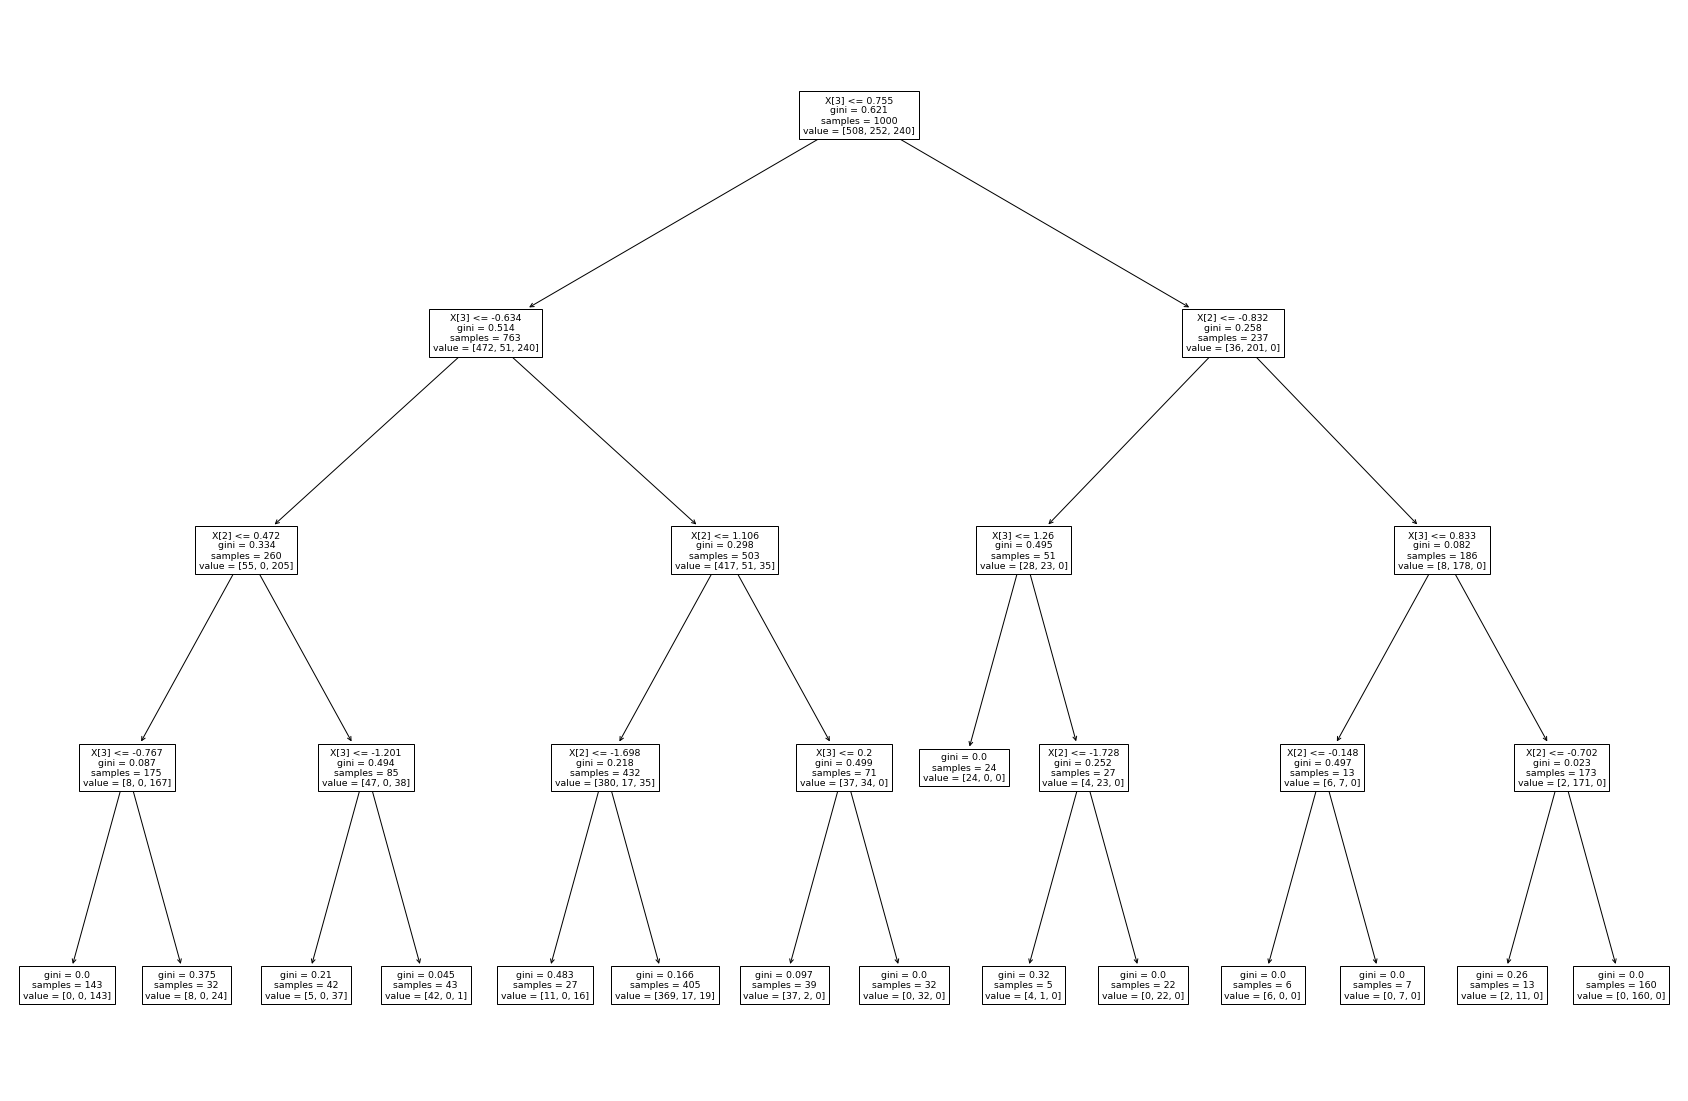

In [794]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(model)
plt.show()
# plt.savefig('decision_tree.pdf')

In [799]:
from sklearn.metrics import accuracy_score
score = accuracy_score(df_test['target_class'], df_test['pred_class'])
score

0.956

In [800]:
# recall

from sklearn.metrics import recall_score
recall = recall_score(df_test['target_class'], df_test['pred_class'], average='micro')
print('recall:',recall)

# precision

from sklearn.metrics import precision_score
precision = precision_score(df_test['target_class'], df_test['pred_class'], average='micro')
print('precision:',precision)

recall: 0.956
precision: 0.956


In [804]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

bg = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 5, max_samples= 500)
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=500,
                  n_estimators=5)

In [805]:
bg.score(x_test, y_test)

0.962

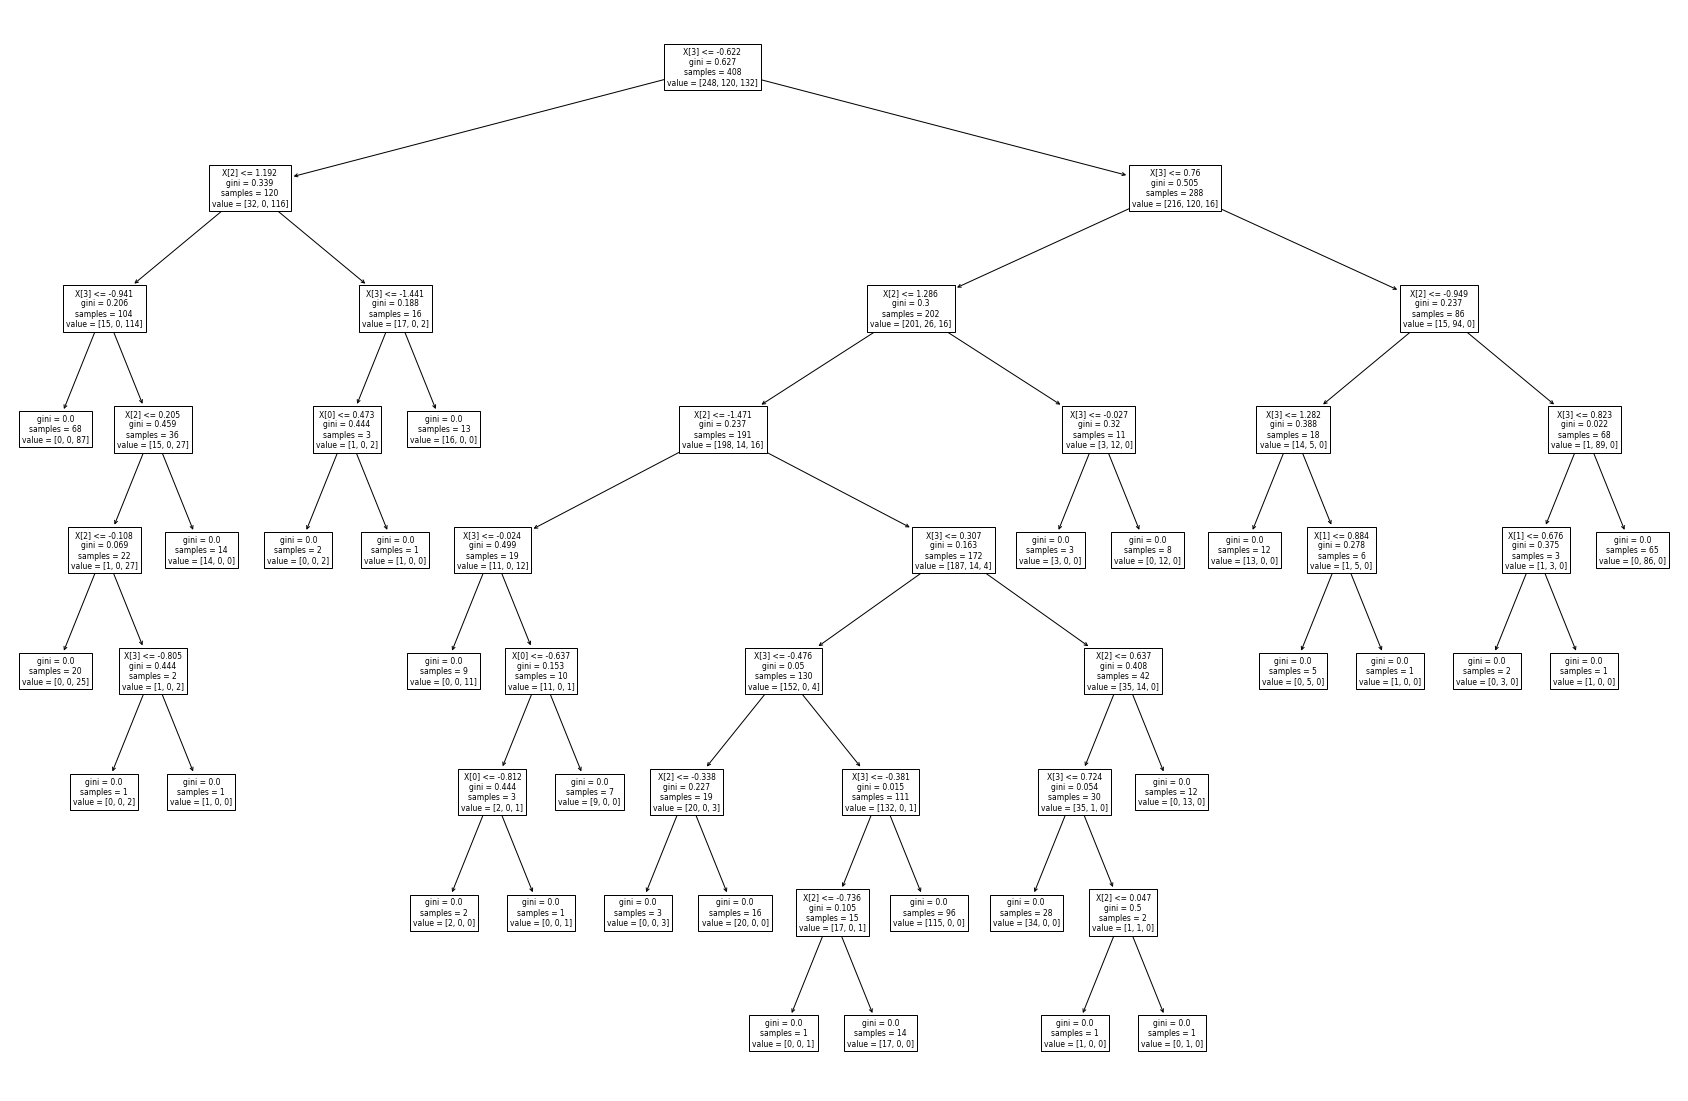

In [803]:
plt.figure(figsize=(30, 20))
plot_tree(bg.estimators_[0])
plt.show()